# 교차 검증 반복자 (Cross Validation iterators)

ref. [참고 자료](https://davinci-ai.tistory.com/18)  
**반복자의 선정은 데이터 세트의 모양과 구조에 따라 신중하게 선택이 되어야 합니다. 일반적으로 독립적인지, 동일한 분포인지를 보게 됩니다**

1. **데이터가 독립적이고 동일한 분포를 가진 경우**  
    - KFold
    - RepeatedKFold
    - LeaveOneOut(LOO)
    - LeavePOutLeaveOneOut(LPO)
    
    
2. **동일한 분포가 아닌 경우**  
    - StratifiedKFold 
    - RepeatedStratifiedKFold
    - StratifiedShuffleSplit
    
    
3. **그룹화된 데이터의 경우**  
    - GroupKFold
    - LeaveOneGroupOut
    - LeavePGroupsOut
    - GroupShuffleSplit
    
    
4. **시계열 데이터의 경우**  
    - TimeSeriesSplit

##### import modules and data sets

In [5]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris, load_diabetes
iris   = load_iris()
diabetes = load_diabetes()

## 데이터가 독립적이고 동일한 분포를 가진 경우

### KFold
---
**k-fold cross validation**
- 모든 데이터를 K개의 Fold로 나누고, 이를 split하여 총 k번의 시행에서 각각 n번째가 fold를 test set의 역할을 한다. n=1,2, ... , K 

<img src="./_images/kfold.png" height="75%" width="75%">

- 'shuffle = True' : 전체 데이터를 Split 하기 전에 한 번 뒤 섞는다.

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle= False, random_state = None)

i = 0
for train_idx, test_idx in kf.split( iris['data'] ) : 
    i += 1 
    
    print('[{}-th iteration]\n- train set size : {}, test set size : {}'.format(i, len(train_idx), len(test_idx)))
    print('- Index of test set is \n{}\n'.format(sorted(test_idx)))

### RepeatedKFold
---
**Repeated k-fold cross validation**

- **k-fold cross validation**을 **n**번 시행한 것임
- 'shuffle = True' 가 기본 세팅

In [ ]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits = 5, n_repeats = 2, random_state = None)

i = 0
for train_idx, test_idx in rkf.split( iris['data'] ) : 
    i += 1 
    
    print('[{}-th iteration]\n- train set size : {}, test set size : {}'.format(i, len(train_idx), len(test_idx)))
    print('- Index of test set is \n{}\n'.format(sorted(test_idx)))

### LeaveOneOut (LOO)
---
전체 데이터에서 하나의 관측치를 제외하고 Train set으로 사용하고 제외한 관측치를 test 용도로 사용한다.

- <=> **하나의 관측치만**을 TEST SET으로 설정
- 데이터의 개수가 적을 때, 데이터의 낭비를 막는 방법
- 결과값들의 분산이 높게 나오는 경우가 많음

In [ ]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

i = 0
for train_idx, test_idx in loo.split( iris['data'] ) : 
    i += 1 
    
    print('[{}-th iteration]\n- train set size : {}, test set size : {}'.format(i, len(train_idx), len(test_idx)))
    print('- Index of test set is \n{}\n'.format(sorted(test_idx)))

### LeavePOut (LPO)
---
**LPO** = LOO + K-fold
- LOO와 마찬가지로 양이 적은 데이터에서 데이터 손실을 막기 위해 고안된 방법
- 전체 데이터에서 **p**개 관측치들을 제외 (모든 조합의 수), 나머지를 Train set, 제외된 관측치들을 Test set



In [ ]:
from sklearn.model_selection import LeavePOut

lpo = lpo = LeavePOut(p=2)

i = 0
for train_idx, test_idx in lpo.split( iris['data'] ) : 
    i += 1 
    
    print('[{}-th iteration]\n- train set size : {}, test set size : {}'.format(i, len(train_idx), len(test_idx)))
    print('- Index of test set is \n{}\n'.format(test_idx))

### ShuffleSplit
---
- k-fold 기반의 방법들과는 다르게 **중복**의 가능성이 있다. (완전 배타를 보장하지 않는다.)
- **n**번의 반복 마다, **test_size** 만큼의 관측치를 test set으로 사용한다.

In [ ]:
from sklearn.model_selection import ShuffleSplit 

ss = ShuffleSplit(n_splits= 5, test_size= 0.3, random_state= 9505)

i = 0
for train_idx, test_idx in ss.split( iris['data'] ) : 
    i += 1 
    
    print('[{}-th iteration]\n- train set size : {}, test set size : {}'.format(i, len(train_idx), len(test_idx)))
    print('- Index of test set is \n{}\n'.format(sorted(test_idx)))

## 동일한 분포가 아닌 경우

### StratifiedKFold
- 분류 문제에서 label의 비율은 Learning에서 아주 중요하게 적용될 수 있다.
- **lable의 비율을 유지**하면서 Train set, Test set을 K-fold cross validation.

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 4)

i = 0
for train_idx, test_idx in skf.split( iris['data'], iris['target'] ) : 
    i += 1 
    
    print('[{}-th iteration]\n- train set size : {}, test set size : {}'.format(i, len(train_idx), len(test_idx)))
    print('- Index of test set is \n{}\n'.format(sorted(test_idx)))

### GroupKFold
---

- 데이터에 Lable을 제외하고 범주형으로 구분된 Group 변수가 존재한다면, 그룹단위로 split 하여 Train set, Test set으로 나눈다.
- 이 때, Test set에 하나의 그룹만 존재한다는 것은 아님.
- 그리고 어떤 Group이든 Train 또는 Test set 둘 중 하나에만 있다.

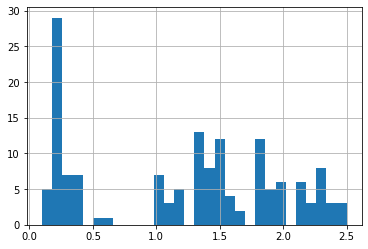

In [69]:
# Edit data for new group 
df_iris = pd.DataFrame(iris.data)
df_iris[3].hist(bins=30)

In [77]:
# Group 변수 추가
df_iris['group'] = 0
df_iris.loc[df_iris[3] > 0.75, 'group'] = 1
df_iris.loc[df_iris[3] > 1.25, 'group'] = 2
df_iris.loc[df_iris[3] > 1.75, 'group'] = 3
df_iris.loc[df_iris[3] > 2.1, 'group'] = 4

# group 변수 추출
group = df_iris['group']

df_iris

,0,1,2,3,group
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,4


In [92]:
# group 별 인덱스
print('[Group 별 index]\n')

list(df_iris[df_iris['group'] == 0].index)
n = df_iris['group'].nunique()

for i in range(n) : 
    print('Group-{}\n : {}\n'.format(i+1, list(df_iris[df_iris['group'] == i].index)))

[Group 별 index]

Group-1
 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

Group-2
 : [57, 60, 62, 67, 69, 73, 79, 80, 81, 82, 90, 92, 93, 95, 98]

Group-3
 : [50, 51, 52, 53, 54, 55, 56, 58, 59, 61, 63, 64, 65, 66, 68, 71, 72, 74, 75, 76, 77, 78, 83, 84, 85, 86, 87, 88, 89, 91, 94, 96, 97, 99, 106, 119, 129, 133, 134]

Group-4
 : [70, 101, 102, 103, 105, 107, 108, 110, 111, 112, 113, 116, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 137, 138, 139, 142, 146, 147, 149]

Group-5
 : [100, 104, 109, 114, 115, 117, 118, 120, 132, 135, 136, 140, 141, 143, 144, 145, 148]



In [78]:
from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=3)

i = 0
for train_idx, test_idx in gkf.split( iris['data'], groups= group ) : 
    i += 1 
    
    print('[{}-th iteration]\n- train set size : {}, test set size : {}'.format(i, len(train_idx), len(test_idx)))
    print('- Index of test set is \n{}\n'.format(sorted(test_idx)))

[1-th iteration]
- train set size : 100, test set size : 50
- Index of test set is 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

[2-th iteration]
- train set size : 96, test set size : 54
- Index of test set is 
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 106, 119, 129, 133, 134]

[3-th iteration]
- train set size : 104, test set size : 46
- Index of test set is 
[70, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]



### LeaveOneGroupOut
---
- 전체 데이터에서 Group들 중에 하나의 Group만 제외하고, 나머지 관측치를 Traing set으로 사용하고 제외된 관측치를 Test set으로 설정
- **시간과 관련된 데이터에서 많이 사용**

In [93]:
from sklearn.model_selection import LeaveOneGroupOut

logo = LeaveOneGroupOut()

i = 0
for train_idx, test_idx in logo.split( iris['data'], groups= group ) : 
    i += 1 
    
    print('[{}-th iteration]\n- train set size : {}, test set size : {}'.format(i, len(train_idx), len(test_idx)))
    print('- Index of test set is \n{}\n'.format(sorted(test_idx)))

[1-th iteration]
- train set size : 100, test set size : 50
- Index of test set is 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

[2-th iteration]
- train set size : 135, test set size : 15
- Index of test set is 
[57, 60, 62, 67, 69, 73, 79, 80, 81, 82, 90, 92, 93, 95, 98]

[3-th iteration]
- train set size : 111, test set size : 39
- Index of test set is 
[50, 51, 52, 53, 54, 55, 56, 58, 59, 61, 63, 64, 65, 66, 68, 71, 72, 74, 75, 76, 77, 78, 83, 84, 85, 86, 87, 88, 89, 91, 94, 96, 97, 99, 106, 119, 129, 133, 134]

[4-th iteration]
- train set size : 121, test set size : 29
- Index of test set is 
[70, 101, 102, 103, 105, 107, 108, 110, 111, 112, 113, 116, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 137, 138, 139, 142, 146, 147, 149]

[5-th iteration]
- train set size : 133, test set size : 17
- Index of test set is 
[100, 104, 109, 1

### LeavePGroupsOut
---
- 전체 데이터에서 p개의 group을 제외하고, 나머지 데이터를 train set으로 사용하고 나머지는 test set으로 사용한다.
- n개의 group이 있다고 할 때, n개중 p개의 모든 조합을 사용한다. (nCp)

In [94]:
from sklearn.model_selection import LeavePGroupsOut

lpgo = LeavePGroupsOut(2)

i = 0
for train_idx, test_idx in lpgo.split( iris['data'], groups= group ) : 
    i += 1 
    
    print('[{}-th iteration]\n- train set size : {}, test set size : {}'.format(i, len(train_idx), len(test_idx)))
    print('- Index of test set is \n{}\n'.format(sorted(test_idx)))


[1-th iteration]
- train set size : 85, test set size : 65
- Index of test set is 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 57, 60, 62, 67, 69, 73, 79, 80, 81, 82, 90, 92, 93, 95, 98]

[2-th iteration]
- train set size : 61, test set size : 89
- Index of test set is 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 61, 63, 64, 65, 66, 68, 71, 72, 74, 75, 76, 77, 78, 83, 84, 85, 86, 87, 88, 89, 91, 94, 96, 97, 99, 106, 119, 129, 133, 134]

[3-th iteration]
- train set size : 71, test set size : 79
- Index of test set is 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,

### GroupShuffleSplit
---
- GroupShuffleSplit = ShuffleSplit + GroupKFold
- 같은 그룹을 공유하는 관측치는 Train or Test set 무조건 둘 중 하나에 속한다.
- 하지만, 반복마다 일정 비율만큼의 group을 test set으로 사용한다. 즉 반복자 간에 완전한 중복이 있지 않다.


In [95]:
from sklearn.model_selection import GroupShuffleSplit

lpgo = GroupShuffleSplit(n_splits = 4, test_size = 0.3, random_state= 9505)

i = 0
for train_idx, test_idx in lpgo.split( iris['data'], groups= group ) : 
    i += 1 
    
    print('[{}-th iteration]\n- train set size : {}, test set size : {}'.format(i, len(train_idx), len(test_idx)))
    print('- Index of test set is \n{}\n'.format(sorted(test_idx)))




[1-th iteration]
- train set size : 96, test set size : 54
- Index of test set is 
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 106, 119, 129, 133, 134]

[2-th iteration]
- train set size : 104, test set size : 46
- Index of test set is 
[70, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]

[3-th iteration]
- train set size : 118, test set size : 32
- Index of test set is 
[57, 60, 62, 67, 69, 73, 79, 80, 81, 82, 90, 92, 93, 95, 98, 100, 104, 109, 114, 115, 117, 118, 120, 132, 135, 136, 140, 141, 143, 144, 145, 148]

[4-th iteration]
- train set size : 96, test set size : 54
- Index of test set is 
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 

## 시계열 데이터인 경우

### TimeSeriesSplit
---
- 시계열 데이터는 시간순을 유지해야하기 때문에, 앞에서 Train data로 사용한 데이터를 그대로 사용한다.
- 즉, Train set의 크기를 키워나가는 방향으로 반복자가 진행된다.

<img src="./_images/tscv.png" height="75%" width="75%">



In [97]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=6)

i = 0
for train_idx, test_idx in tscv.split( iris['data'] ) : 
    i += 1 
    
    print('[{}-th iteration]\n- train set size : {}, test set size : {}'.format(i, len(train_idx), len(test_idx)))
    print('- Index of test set is \n{}\n'.format(sorted(test_idx)))


[1-th iteration]
- train set size : 24, test set size : 21
- Index of test set is 
[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]

[2-th iteration]
- train set size : 45, test set size : 21
- Index of test set is 
[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]

[3-th iteration]
- train set size : 66, test set size : 21
- Index of test set is 
[66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]

[4-th iteration]
- train set size : 87, test set size : 21
- Index of test set is 
[87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107]

[5-th iteration]
- train set size : 108, test set size : 21
- Index of test set is 
[108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]

[6-th iteration]
- train set size : 129, test set size : 21
- Index of test set is 
[129, 130, 131, 132, 133, 134, 135, 136, 

# 응용해서 사용할 수 있는 함수
- cross_val_score()
- cross_validate()

## cross_val_score( )
---
### parameters
- **estimator :** 학습할 모델을 의미
- **X :** 학습 시킬 DATA SET
- **y :** 학습 시킬 Lable
- **scoring :** (string/None)  
    - 각 모델의 평가 방법
    - CV는 utility function을 사용(**큰 값이 좋은 값이라고 판단**)  
        => 따라서 MSE와 같이 작을 수록 좋은 평가 지표를 사용할 때는 'neg_mean_squared_error'와 같은 지표를 사용한다.
- **cv :** (int/kfold)
    - **cross validation generator**
    - 사용할 CV 기법을 선택하면 된다. 만약에 정수로 넣을 경우 K-fold cv의 k값으로 판단한다.
- **scores :** (returns, array) scoring을 사용하여 평가한 점수를 각각 CV 반복자의 반복마다 기록하여 표시해준다.
- **1**